In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from datetime import timedelta, datetime
import statsmodels.api as sm

from env import user, password, host
import QMCBT_01_acquire as acquire
import QMCBT_02_prepare as prepare


import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

<div class="alert alert-danger">


### Notice that we still have the same issue we ran into before. If we want to use this method and we don't want to split in the middle of a day, we will need to either algorithmically or manually tweak the split points.

<div class="alert alert-success">

    
# Prepare Exercises
The end result of this exercise should be a file named `prepare.py`.

**Using your store items data:**

In [3]:
df = acquire.wrangle_store_data()
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   item_upc14     913000 non-null  int64  
 3   item_upc12     913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   sale_id        913000 non-null  int64  
 8   sale_date      913000 non-null  object 
 9   sale_amount    913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 97.5+ MB


In [5]:
df.isnull().sum()

store_id         0
item_id          0
item_upc14       0
item_upc12       0
item_brand       0
item_name        0
item_price       0
sale_id          0
sale_date        0
sale_amount      0
store_address    0
store_zipcode    0
store_city       0
store_state      0
dtype: int64

<div class="alert alert-warning">

    
## 1. Convert date column to datetime format.

In [6]:
df.sale_date = pd.to_datetime(df.sale_date, infer_datetime_format=True)
df.head().T

,0,1,2,3,4
store_id,1,1,1,1,1
item_id,1,1,1,1,1
item_upc14,35200264013,35200264013,35200264013,35200264013,35200264013
item_upc12,35200264013,35200264013,35200264013,35200264013,35200264013
item_brand,Riceland,Riceland,Riceland,Riceland,Riceland
item_name,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice
item_price,0.84,0.84,0.84,0.84,0.84
sale_id,1,2,3,4,5
sale_date,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00
sale_amount,13,11,14,13,10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   store_id       913000 non-null  int64         
 1   item_id        913000 non-null  int64         
 2   item_upc14     913000 non-null  int64         
 3   item_upc12     913000 non-null  int64         
 4   item_brand     913000 non-null  object        
 5   item_name      913000 non-null  object        
 6   item_price     913000 non-null  float64       
 7   sale_id        913000 non-null  int64         
 8   sale_date      913000 non-null  datetime64[ns]
 9   sale_amount    913000 non-null  int64         
 10  store_address  913000 non-null  object        
 11  store_zipcode  913000 non-null  int64         
 12  store_city     913000 non-null  object        
 13  store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(5

<div class="alert alert-warning">

    
## 2. Plot the distribution of sale_amount and item_price.

Text(0.5, 1.0, 'Distribution of sale amount')

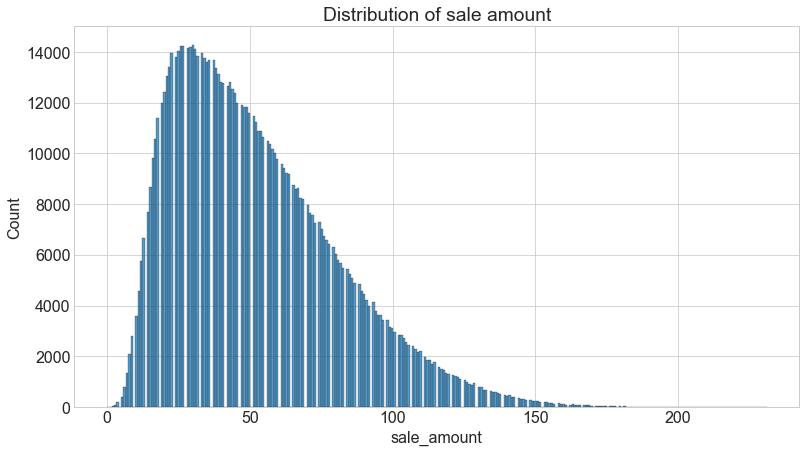

In [8]:
# Plot Sales Amount
sns.histplot(df.sale_amount)
plt.title('Distribution of sale amount')

Text(0.5, 1.0, 'Distribution of item price')

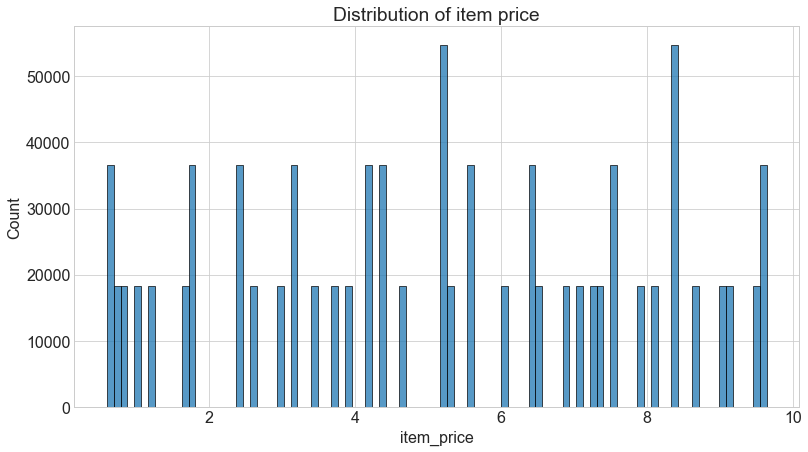

In [9]:
# Plot Item Price
sns.histplot(df.item_price)
plt.title('Distribution of item price')

<div class="alert alert-warning">

    
## 3. Set the index to be the datetime variable.
## 4. Add a 'month' and 'day of week' column to your dataframe.

In [10]:
# Resample by the Day, Month, Year BEFORE RESET INDEX
df['day'] = df.sale_date.dt.day
df['day_of_week'] = df.sale_date.dt.day_name()
df['weekday_number'] = df.sale_date.dt.day_of_week+1
df['year'] = df.sale_date.dt.year
df['month'] = df.sale_date.dt.month_name()
df['month_number'] = df.sale_date.dt.month
#df['hour'] = df.sale_date.dt.hour
#df['minute'] = df.sale_date.dt.minute

In [11]:
#### Reset & Sort index to date
df = df.set_index('sale_date').sort_index()
df.head().T

sale_date,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01
store_id,1,3,10,3,3
item_id,1,17,7,18,19
item_upc14,35200264013,88313590791,70177154004,21200725340,41520035646
item_upc12,35200264013,88313590791,70177154004,21200725340,41520035646
item_brand,Riceland,Ducal,Twinings Of London,Scotch,Careone
item_name,Riceland American Jazmine Rice,Ducal Refried Red Beans,Twinings Of London Classics Lady Grey Tea - 20 Ct,Scotch Removable Clear Mounting Squares - 35 Ct,Careone Family Comb Set - 8 Ct
item_price,0.84,1.16,9.64,4.39,0.74
sale_id,1,295813,125995,314073,332333
sale_amount,13,26,32,45,34
store_address,12125 Alamo Ranch Pkwy,2118 Fredericksburg Rdj,8503 NW Military Hwy,2118 Fredericksburg Rdj,2118 Fredericksburg Rdj


<div class="alert alert-warning">

    
## 5. Add a column to your dataframe, sales_total, which is derived from sale_amount (total items) and item_price.

In [12]:
# Create Sales Total column from Item Price multiplied by Sales Amount
df['sales_total'] = df.sale_amount * df.item_price
df.head().T

sale_date,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01
store_id,1,3,10,3,3
item_id,1,17,7,18,19
item_upc14,35200264013,88313590791,70177154004,21200725340,41520035646
item_upc12,35200264013,88313590791,70177154004,21200725340,41520035646
item_brand,Riceland,Ducal,Twinings Of London,Scotch,Careone
item_name,Riceland American Jazmine Rice,Ducal Refried Red Beans,Twinings Of London Classics Lady Grey Tea - 20 Ct,Scotch Removable Clear Mounting Squares - 35 Ct,Careone Family Comb Set - 8 Ct
item_price,0.84,1.16,9.64,4.39,0.74
sale_id,1,295813,125995,314073,332333
sale_amount,13,26,32,45,34
store_address,12125 Alamo Ranch Pkwy,2118 Fredericksburg Rdj,8503 NW Military Hwy,2118 Fredericksburg Rdj,2118 Fredericksburg Rdj


<div class="alert alert-warning">

    
## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [13]:
def dmy_conversion(df, datetime_column):
    """
    This function ensures the datetime_column given as an argument is converted to dtype of datetime64.
    Then adds Day, Month, and Year columns and sets the index to the datetime_column
    """
    
    # Ensure datetime_column is dtype datetime64
    df[datetime_column] = pd.to_datetime(df[datetime_column])
    
    # Convert datetime_column column to Day, Month, Year
    df['day'] = df[datetime_column].dt.day
    df['day_of_week'] = df[datetime_column].dt.day_name()
    df['weekday_number'] = df[datetime_column].dt.day_of_week+1
    df['year'] = df[datetime_column].dt.year
    df['month'] = df[datetime_column].dt.month_name()
    df['month_number'] = df[datetime_column].dt.month
    #df['hour'] = df[datetime_column].dt.hour
    #df['minute'] = df[datetime_column].dt.minute
    #df['second'] = df[datetime_column].dt.second
    
    # FUTURE FUNCTIONALITY
    # Use IF statements and D,M,Y,H,Min,Sec arguments to determin layers of conversion
    
    return df


In [14]:
def prep_store_data(df, datetime_column):
    """
    Combine functions needed to prepare store data for use. 
    """
    
    # Convert sale_date column to datetime format; Add Day, Month, Year columns; set Index to sale_date 
    dmy_conversion(df, datetime_column)
    
    # Create Sales Total column from Item Price multiplied by Sales Amount
    df['sales_total'] = df.sale_amount * df.item_price
    
    return df

In [15]:
# Acquire Store Data
store_df = acquire.wrangle_store_data()
# Prepare Store Data
prep_store_data(store_df, 'sale_date')
# Set Index (I could not get this to run inside a Function???)
store_df = store_df.set_index('sale_date').sort_index()
store_df.T

sale_date,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,...,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31
store_id,1,3,10,3,3,3,10,3,3,10,...,7,7,7,7,7,7,7,7,7,10
item_id,1,17,7,18,19,20,6,21,22,5,...,34,35,36,37,38,39,40,41,28,50
item_upc14,35200264013,88313590791,70177154004,21200725340,41520035646,204040000000,74170388732,753950001954,16000288829,759283100036,...,312546628694,33674100066,610358991525,73575295003,30768540548,28400029254,42272008063,31000670016,719175900007,47445919221
item_upc12,35200264013,88313590791,70177154004,21200725340,41520035646,204040000000,74170388732,753950001954,16000288829,759283100036,...,312546628694,33674100066,610358991525,73575295003,30768540548,28400029254,42272008063,31000670016,719175900007,47445919221
item_brand,Riceland,Ducal,Twinings Of London,Scotch,Careone,Usda Produce,Sally Hansen,Doctors Best,Betty Crocker,Back To Nature,...,Halls,Natures Way,Deerfields Gluten Free,Nakano,Sundown Naturals,Munchies,Amys,P.f. Changs,Usda Produce,Choice
item_name,Riceland American Jazmine Rice,Ducal Refried Red Beans,Twinings Of London Classics Lady Grey Tea - 20 Ct,Scotch Removable Clear Mounting Squares - 35 Ct,Careone Family Comb Set - 8 Ct,Plums Black,Sally Hansen Nail Color Magnetic 903 Silver El...,Doctors Best Best Curcumin C3 Complex 1000mg T...,Betty Crocker Twin Pack Real Potatoes Scallope...,Back To Nature Gluten Free White Cheddar Rice ...,...,Halls Menthol Cough Suppresant/oral Anesthetic...,Natures Way Forskohlii - 60 Ct,Rice Bran Gluten Free Dinner Rolls Plain,Nakano Seasoned Rice Vinegar Original,Sundown Naturals Essential Electrolytes Tropic...,Munchies Sandwich Crackers Cheddar Cheese On G...,Amys Light & Lean Spaghetti Italiano,P.f. Changs Home Menu Meal For Two Beef With B...,Guava,Choice Organic Teas Black Tea Classic Black - ...
item_price,0.84,1.16,9.64,4.39,0.74,5.62,6.93,8.09,7.31,2.61,...,4.17,5.19,7.95,9.59,3.45,9.02,0.6,5.62,7.52,5.2
sale_id,1,295813,125995,314073,332333,350593,107735,368853,387113,89475,...,615362,633622,651882,670142,688402,706662,724922,743182,505802,913000
sale_amount,13,26,32,45,34,29,32,25,50,8,...,18,62,53,16,46,31,22,19,59,82
store_address,12125 Alamo Ranch Pkwy,2118 Fredericksburg Rdj,8503 NW Military Hwy,2118 Fredericksburg Rdj,2118 Fredericksburg Rdj,2118 Fredericksburg Rdj,8503 NW Military Hwy,2118 Fredericksburg Rdj,2118 Fredericksburg Rdj,8503 NW Military Hwy,...,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,8503 NW Military Hwy


## Test ```prepare.py```

In [16]:
# Acquire Store Data
store_data_df = acquire.wrangle_store_data()
# Prepare Store Data
prepare.prep_store_data(store_data_df, 'sale_date')
# Set Index (I could not get this to run inside a Function???)
store_data_df = store_data_df.set_index('sale_date').sort_index()
store_data_df.T

sale_date,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,...,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31,2017-12-31
store_id,1,3,10,3,3,3,10,3,3,10,...,7,7,7,7,7,7,7,7,7,10
item_id,1,17,7,18,19,20,6,21,22,5,...,34,35,36,37,38,39,40,41,28,50
item_upc14,35200264013,88313590791,70177154004,21200725340,41520035646,204040000000,74170388732,753950001954,16000288829,759283100036,...,312546628694,33674100066,610358991525,73575295003,30768540548,28400029254,42272008063,31000670016,719175900007,47445919221
item_upc12,35200264013,88313590791,70177154004,21200725340,41520035646,204040000000,74170388732,753950001954,16000288829,759283100036,...,312546628694,33674100066,610358991525,73575295003,30768540548,28400029254,42272008063,31000670016,719175900007,47445919221
item_brand,Riceland,Ducal,Twinings Of London,Scotch,Careone,Usda Produce,Sally Hansen,Doctors Best,Betty Crocker,Back To Nature,...,Halls,Natures Way,Deerfields Gluten Free,Nakano,Sundown Naturals,Munchies,Amys,P.f. Changs,Usda Produce,Choice
item_name,Riceland American Jazmine Rice,Ducal Refried Red Beans,Twinings Of London Classics Lady Grey Tea - 20 Ct,Scotch Removable Clear Mounting Squares - 35 Ct,Careone Family Comb Set - 8 Ct,Plums Black,Sally Hansen Nail Color Magnetic 903 Silver El...,Doctors Best Best Curcumin C3 Complex 1000mg T...,Betty Crocker Twin Pack Real Potatoes Scallope...,Back To Nature Gluten Free White Cheddar Rice ...,...,Halls Menthol Cough Suppresant/oral Anesthetic...,Natures Way Forskohlii - 60 Ct,Rice Bran Gluten Free Dinner Rolls Plain,Nakano Seasoned Rice Vinegar Original,Sundown Naturals Essential Electrolytes Tropic...,Munchies Sandwich Crackers Cheddar Cheese On G...,Amys Light & Lean Spaghetti Italiano,P.f. Changs Home Menu Meal For Two Beef With B...,Guava,Choice Organic Teas Black Tea Classic Black - ...
item_price,0.84,1.16,9.64,4.39,0.74,5.62,6.93,8.09,7.31,2.61,...,4.17,5.19,7.95,9.59,3.45,9.02,0.6,5.62,7.52,5.2
sale_id,1,295813,125995,314073,332333,350593,107735,368853,387113,89475,...,615362,633622,651882,670142,688402,706662,724922,743182,505802,913000
sale_amount,13,26,32,45,34,29,32,25,50,8,...,18,62,53,16,46,31,22,19,59,82
store_address,12125 Alamo Ranch Pkwy,2118 Fredericksburg Rdj,8503 NW Military Hwy,2118 Fredericksburg Rdj,2118 Fredericksburg Rdj,2118 Fredericksburg Rdj,8503 NW Military Hwy,2118 Fredericksburg Rdj,2118 Fredericksburg Rdj,8503 NW Military Hwy,...,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd,8503 NW Military Hwy


<div class="alert alert-success">

    
# ```OPS``` data

**Using OPS data (hint: if you don't know how to acquire this data, do a bit of google searching on how to do this with pandas):**
- Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

In [17]:
opsd = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [18]:
opsd.T

,0,1,2,3,4,5,6,7,8,9,...,4373,4374,4375,4376,4377,4378,4379,4380,4381,4382
Date,2006-01-01,2006-01-02,2006-01-03,2006-01-04,2006-01-05,2006-01-06,2006-01-07,2006-01-08,2006-01-09,2006-01-10,...,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31
Consumption,1069.184,1380.521,1442.533,1457.217,1477.131,1403.427,1300.287,1207.985,1529.323,1576.911,...,1423.23782,1272.17085,1141.7573,1111.28338,1130.11683,1263.94091,1299.86398,1295.08753,1215.44897,1107.11488
Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,228.773,748.074,812.422,587.81,717.453,394.507,506.424,584.277,721.247,721.176
Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.065,8.45,9.949,15.765,30.923,16.53,14.162,29.854,7.467,19.98
Wind+Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,238.838,756.524,822.371,603.575,748.376,411.037,520.586,614.131,728.714,741.156


In [19]:
opsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


<div class="alert alert-warning">

    
## 1. Convert date column to datetime format.

In [20]:
# Use custom Function to convert datetime column and Add Day, Month, Year columns
prepare.dmy_conversion(opsd, 'Date')

,Date,Consumption,Wind,Solar,Wind+Solar,day,day_of_week,weekday_number,year,month,month_number
0,2006-01-01,1069.18400,NaN,NaN,NaN,1,Sunday,7,2006,January,1
1,2006-01-02,1380.52100,NaN,NaN,NaN,2,Monday,1,2006,January,1
2,2006-01-03,1442.53300,NaN,NaN,NaN,3,Tuesday,2,2006,January,1
3,2006-01-04,1457.21700,NaN,NaN,NaN,4,Wednesday,3,2006,January,1
4,2006-01-05,1477.13100,NaN,NaN,NaN,5,Thursday,4,2006,January,1
...,...,...,...,...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,27,Wednesday,3,2017,December,12
4379,2017-12-28,1299.86398,506.424,14.162,520.586,28,Thursday,4,2017,December,12
4380,2017-12-29,1295.08753,584.277,29.854,614.131,29,Friday,5,2017,December,12
4381,2017-12-30,1215.44897,721.247,7.467,728.714,30,Saturday,6,2017,December,12


<div class="alert alert-warning">


## 2. Plot the distribution of each of your variables.

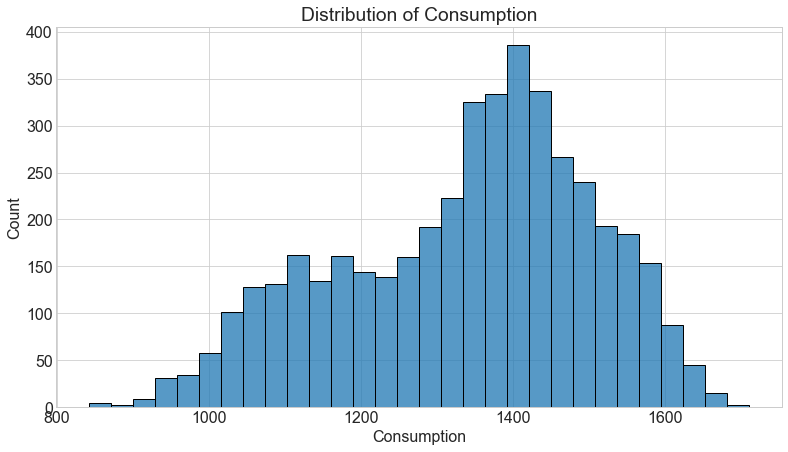

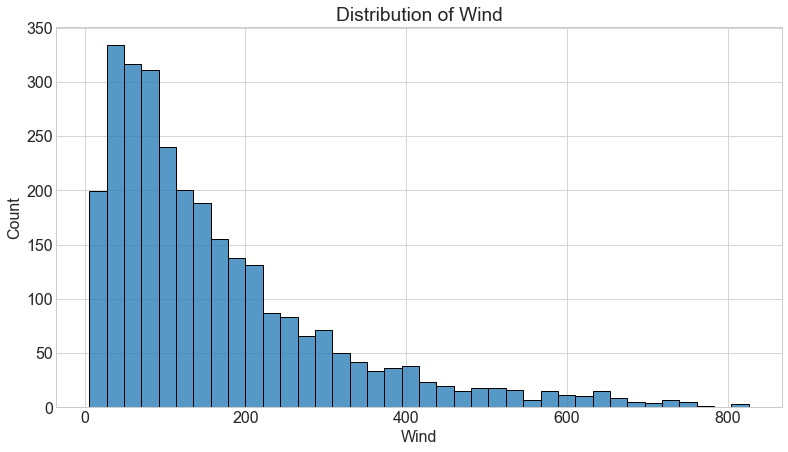

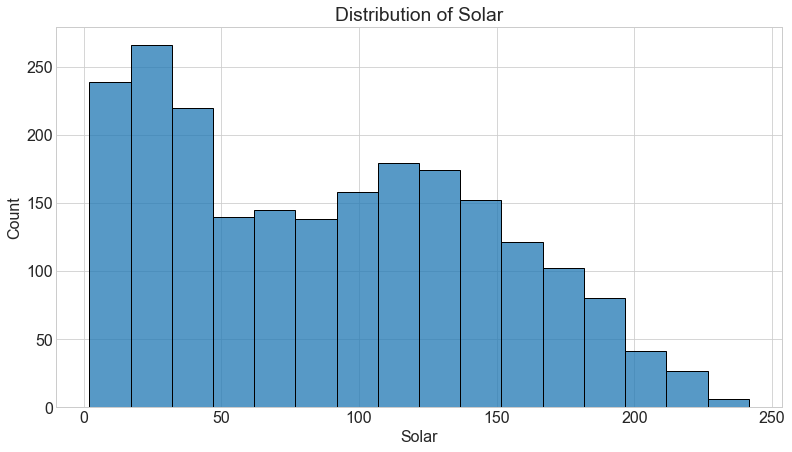

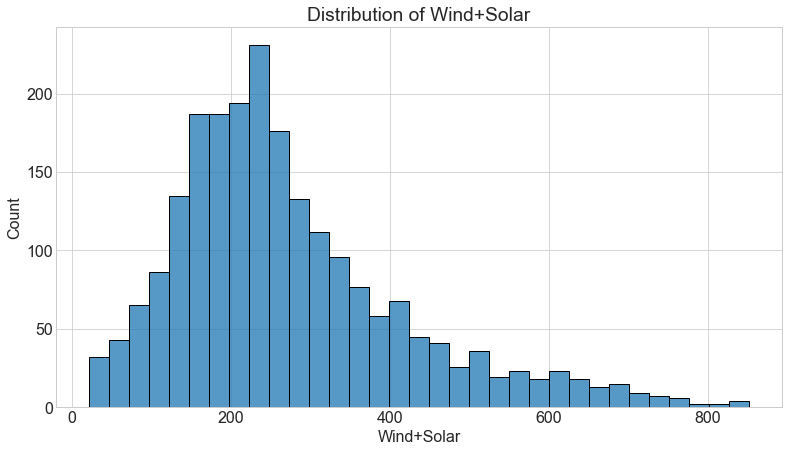

In [21]:
for col in list(['Consumption','Wind', 'Solar', 'Wind+Solar']):
    figure = figsize=(1, 0)
    plt.figure()
    sns.histplot(opsd[col])
    plt.title('Distribution of {}'.format(col))

<div class="alert alert-warning">


## 3. Set the index to be the datetime variable.

In [22]:
opsd = opsd.set_index('Date').sort_index()

In [23]:
opsd

,Consumption,Wind,Solar,Wind+Solar,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,1,Sunday,7,2006,January,1
2006-01-02,1380.52100,NaN,NaN,NaN,2,Monday,1,2006,January,1
2006-01-03,1442.53300,NaN,NaN,NaN,3,Tuesday,2,2006,January,1
2006-01-04,1457.21700,NaN,NaN,NaN,4,Wednesday,3,2006,January,1
2006-01-05,1477.13100,NaN,NaN,NaN,5,Thursday,4,2006,January,1
...,...,...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,27,Wednesday,3,2017,December,12
2017-12-28,1299.86398,506.424,14.162,520.586,28,Thursday,4,2017,December,12
2017-12-29,1295.08753,584.277,29.854,614.131,29,Friday,5,2017,December,12


<div class="alert alert-warning">


## 4. Add a month and a year column to your dataframe.

<div class="alert alert-info">


### Answer:
* Already accomplished under Q1 using custom function ```dmy_conversion```

<div class="alert alert-warning">


## 5. Fill any missing values.

In [24]:
# Show row count
opsd.shape[0]

4383

In [25]:
# Show Null count
opsd.isnull().sum()

Consumption          0
Wind              1463
Solar             2195
Wind+Solar        2196
day                  0
day_of_week          0
weekday_number       0
year                 0
month                0
month_number         0
dtype: int64

In [26]:
# Replace all null with 0 and show resulting null count
opsd.fillna(0, inplace=True)
opsd.isnull().sum()

Consumption       0
Wind              0
Solar             0
Wind+Solar        0
day               0
day_of_week       0
weekday_number    0
year              0
month             0
month_number      0
dtype: int64

<div class="alert alert-warning">


## 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [27]:
def prep_ops_data(df, datetime_column):
    """
    Combine functions needed to prepare ops data for use. 
    """
    
    # Convert sale_date column to datetime format; Add Day, Month, Year columns; set Index to sale_date 
    dmy_conversion(df, datetime_column)
    
    # Replace all null with 0 and show resulting null count
    df.fillna(0, inplace=True)
    
    return df

In [ ]:
# Creating a separate function and running it inside the prep function allows this to run
def set_index(df, datetime_column):
    df = df.set_index(datetime_column).sort_index()
    
    return df

In [28]:
# Acquire OPS Data
opsd_df = acquire.get_opsd_data()

In [29]:
# Prepare OPS Data
prepare.prep_ops_data(opsd_df, 'Date')

,Consumption,Wind,Solar,Wind+Solar,day,day_of_week,weekday_number,year,month,month_number
Date,,,,,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,Sunday,7,2006,January,1
2006-01-02,1380.52100,0.000,0.000,0.000,2,Monday,1,2006,January,1
2006-01-03,1442.53300,0.000,0.000,0.000,3,Tuesday,2,2006,January,1
2006-01-04,1457.21700,0.000,0.000,0.000,4,Wednesday,3,2006,January,1
2006-01-05,1477.13100,0.000,0.000,0.000,5,Thursday,4,2006,January,1
...,...,...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,27,Wednesday,3,2017,December,12
2017-12-28,1299.86398,506.424,14.162,520.586,28,Thursday,4,2017,December,12
2017-12-29,1295.08753,584.277,29.854,614.131,29,Friday,5,2017,December,12


In [30]:
opsd_df.isnull().sum()

Date              0
Consumption       0
Wind              0
Solar             0
Wind+Solar        0
day               0
day_of_week       0
weekday_number    0
year              0
month             0
month_number      0
dtype: int64

```quit()```... |